In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split

from queue import*
from collections import defaultdict
import random

In [2]:
filepath = "saveMe.csv" #input("Enter Filename with extension: ")
file = open(filepath, "r")#, encoding='latin-1')

# 0 category, 1 subcategory, 2 lean rep%, 3 lean dem%, 4 indep%, 5 total num

category = ""

line = file.readline()
overall = []
while line != "":
	theLine = line.split(",")
	#print("The Line:", theLine)
	if theLine[0] == "":
		line = file.readline()
		continue

	category = theLine[0]
	subcategory = [theLine[1]]
	numRep = [float(theLine[2]) * float(theLine[5])]
	numDem = [float(theLine[3]) * float(theLine[5])]
	numIndep = [float(theLine[4]) * float(theLine[5])]
	
	line = file.readline()
	theLine = line.split(",")
	while(theLine[0] == category):
		#print("The Line:", theLine)
		subcategory.append(theLine[1])
		numRep.append(float(theLine[2]) * float(theLine[5]))
		numDem.append(float(theLine[3]) * float(theLine[5]))
		numIndep.append(float(theLine[4]) * float(theLine[5]))
		line = file.readline()
		theLine = line.split(",")

	#printing out the results
	print("Republican by ", category, ": ", sep="", end="")
	repTotal = 0;
	for k in numRep:
		repTotal += k
	for k in range(0, len(subcategory)):
		if k == len(subcategory) - 1:
			print("{0:.1%}".format(numRep[k] / repTotal), " ", subcategory[k], sep="")
		else:
			print("{0:.1%}".format(numRep[k] / repTotal), " ", subcategory[k], ", ", sep="", end="")

	print("Democrat by ", category, ": ", sep="", end="")
	demTotal = 0;
	for k in numDem:
		demTotal += k
	for k in range(0, len(subcategory)):
		if k == len(subcategory) - 1:
			print("{0:.1%}".format(numDem[k] / demTotal), " ", subcategory[k], sep="")
		else:
			print("{0:.1%}".format(numDem[k] / demTotal), " ", subcategory[k], ", ", sep="", end="")

	print("Independent by ", category, ": ", sep="", end="")
	indepTotal = 0;
	for k in numIndep:
		indepTotal += k
	for k in range(0, len(subcategory)):
		if k == len(subcategory) - 1:
			print("{0:.1%}".format(numIndep[k] / indepTotal), " ", subcategory[k], sep="")
		else:
			print("{0:.1%}".format(numIndep[k] / indepTotal), " ", subcategory[k], ", ", sep="", end="")
	print()

	#saving the results into "overall"
	subCatListRep = []
	for k in range(0, len(subcategory)):
		subCatListRep.append([subcategory[k], numRep[k] / repTotal])
	overall.append(["Republican by " + category, subCatListRep])

	subCatListDem = []
	for k in range(0, len(subcategory)):
		subCatListDem.append([subcategory[k], numDem[k] / demTotal])
	overall.append(["Democrat by " + category, subCatListDem])

	subCatListIndep = []
	for k in range(0, len(subcategory)):
		subCatListIndep.append([subcategory[k], numIndep[k] / indepTotal])
	overall.append(["Independent by " + category, subCatListIndep])

Republican by GENDER: 55.8% Men, 44.2% Women
Democrat by GENDER: 47.2% Men, 52.8% Women
Independent by GENDER: 53.3% Men, 46.7% Women

Republican by RACE/ETHNICITY: 88.8% White non-Hispanic, 2.8% Black non-Hispanic, 6.9% Hispanic, 1.5% Asian non-Hispanic (English-speaking only)
Democrat by RACE/ETHNICITY: 64.8% White non-Hispanic, 18.2% Black non-Hispanic, 13.2% Hispanic, 3.8% Asian non-Hispanic (English-speaking only)
Independent by RACE/ETHNICITY: 71.8% White non-Hispanic, 8.2% Black non-Hispanic, 17.1% Hispanic, 2.8% Asian non-Hispanic (English-speaking only)

Republican by DETAILED GENERATION: 10.0% Younger Millennial (18-25), 8.9% Older Millennial (26-33), 8.6% Younger Gen Xer (34-41), 11.8% Older Gen Xer (42-49), 18.6% Younger Boomer (50-58), 21.0% Older Boomer (59-68), 15.0% Younger Silent (69-78), 6.1% Older Silent (79-86)
Democrat by DETAILED GENERATION: 11.9% Younger Millennial (18-25), 11.4% Older Millennial (26-33), 9.9% Younger Gen Xer (34-41), 12.0% Older Gen Xer (42-49),

In [3]:
print(overall[0])

['Republican by GENDER', [['Men', 0.5576802479346354], ['Women', 0.4423197520653646]]]


## IO Code

In [10]:
reps = []
dems = []
inds = []
for i in range(len(overall)):
    if(i%3==0):
        reps.append(overall[i])
    elif(i%3==1):
        dems.append(overall[i])
    else:
        inds.append(overall[i])

In [11]:
X = []
y = []

In [12]:
for i in range(1000): #republicans
    person = []
    for feature in dems:
        options = feature[1]
        prob = random.random()
        for featselection, option in enumerate(options):
            value = option[1]
            if(prob<value):
                person.append(featselection)
                break
            prob-=value
    X.append(person)
    y.append(0)
for i in range(1000): #democrats
    person = []
    for feature in dems:
        options = feature[1]
        prob = random.random()
        for featselection, option in enumerate(options):
            value = option[1]
            if(prob<value):
                person.append(featselection)
                break
            prob-=value
    X.append(person)
    y.append(1)
for i in range(0): #independents
    person = []
    for feature in dems:
        options = feature[1]
        prob = random.random()
        for featselection, option in enumerate(options):
            value = option[1]
            if(prob<value):
                person.append(featselection)
                break
            prob-=value
    X.append(person)
    y.append(2)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
print(len(X_train),len(X_test),len(y_train),len(y_test))

1600 400 1600 400


## Iris IO

In [9]:
iris = datasets.load_iris()
X = iris.data  # we only take the first two features.
y = iris.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Classifier

In [15]:
# classify preliminary with SVM
clf = svm.SVC(probability=True)
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
y_predict = clf.predict(X_test)
y_score = clf.decision_function(X_test)
print(accuracy_score(y_test, y_predict))

0.5


## Correlation

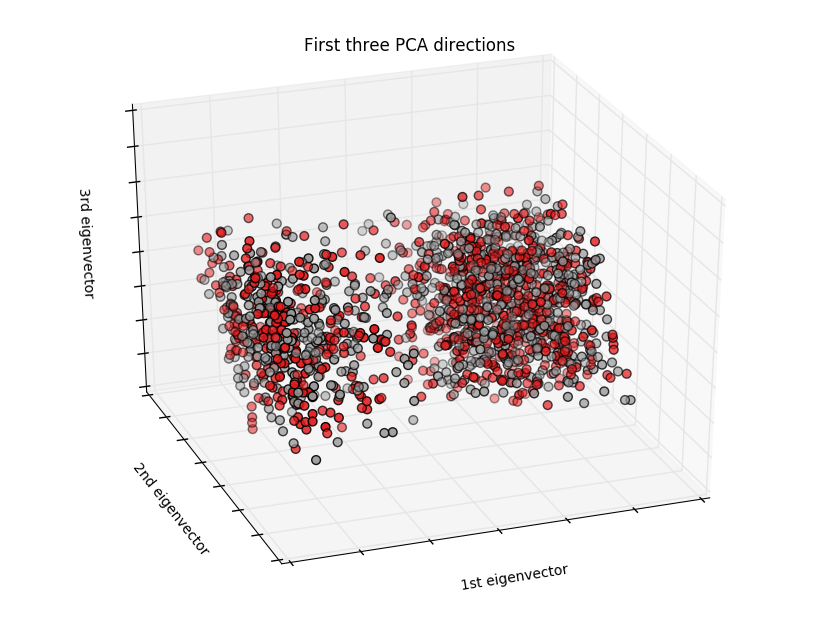

In [17]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X_train)                    #This is X_train
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_train,  #This is y_trian
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

## Confidence

In [13]:
print(clf.predict_proba(X_test[20]))
#print(clf.predict_proba(X_test))

[[ 0.51050294  0.48949706]]


C:\Users\mihir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
